# Capstone (FINAL) Project - The Battle of Neighorboods


## Title - Best Location for to Open a New Wine Shop in Paris

This notebook will contain Week 1 and Week 2 assignments

# Week 1

1. Introduction / Business Problem / Requirements
2. Decription of the data and how it will resolve the business problem

## 1. Introduction / Business Problem

### Locations for a New Wine shop in High Traffic Areas in Paris France

A successful Online wine shop wants to go into retailing to own a physical store where they can entertain customers and give them a taste of the wine before the customers can buy.

According to their market survey, they are planning to launch a new brand of wine and they figured out if people get to taste the wine firstm they will prefer it to wines from other competitors. But being an e-commerce guru with only online presence, there is no way they can get people to taste the new set of wines and also to entertain people.

As a data scientist, I have been given the task to analyze all locations in Paris and provide which is the best location for them to open this wine shop. I am to leverage on existing data to help them make a good data-driven decision on which location has the highest traffic in Paris.

I will be leveraging on Foursquare Location data to help me provide the required solution and help the company in making data-driven decisions about the best location to launch from.

#### Criteria
According to some qualitative data analysis online, they suggest that the best location to open a new wine shop might not be where other wineshops are, but locations where there are Restaurants, Cafes and Bars.
A location where people go to socialize alot and frequently, so opening a wine shope in that location might just be the best.

Narrowing down the data to the best district options derived from qualitative analysis allows for either further research to be conducted on people taste, or physical searching for specific location by the company.

#### Why Data?

Without using data to make decisions about the best location for a new wine shop, the company could spend countless hours walking around, consulting clubs and party goers who will only give them advise based on their person preference, and they might end up opening in a location that is not ideal.

Data will provide better answers and better solutions to their task at hand.

#### Outcomes

The goal is to identify the best location - Arrondissements - to open new wine shop as part of the company's plan to launch new brands of wine. The results will be sold to the management in a basic form that will help the data-driven analysis for the best locations to open the wine shop.

## 2. The Data

### The main data for this project wil be gotten from Foursquare Location data and Municipax data exported from https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

According to my research, the main districts in Paris are divided into 20 Arrondissements Municipaux (administrative districts), shortened to arrondissements.

The data regarding the districts in Paris needs has been researched and identified. Data wrangling and cleaning will have to be performed on these data.

Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go to Restaurants, Cafes, Bars, dining and entertainment - the areas where a new wine shop can be opened.

#### The Data Science Workflow for this part includes the following:

- Outline the initial data that is required: District data for Paris including names, location data if available, and any other details required.
- Obtain the Data: Research and find suitable sources for the district data for Paris. Access and explore the data to determine if it can be manipulated for our purposes.
- Initial Data Wrangling and Cleaning: Clean the data and convert to a useable form as a dataframe.

#### Importing All Required Libraries

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Importing Paris District Data

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name. This data is necessary to select the best location for this wine shop.

The data is available on wikipedia  (https://en.wikipedia.org/wiki/Arrondissements_of_Paris) but a better version is available and exported from https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

After exporting the data to CSV, I uploaded to my github account where i will be using the data from https://raw.githubusercontent.com/olaniyisinet/Coursera_Capstone/master/Arrondissements_.csv

In [2]:
paris = pd.read_csv('https://raw.githubusercontent.com/olaniyisinet/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### Exploring and Cleaning the Data

In [3]:
# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### Removing unncesary Columns from the dataset

In [4]:
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


#### We have successfully identified the problem statement and also identified the data to be used for this. This sums up our activities for week one.

- Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute.
- Describe the data that you will be using to solve the problem or execute your idea.

#### Week 1 Ends HERE ---------------------------------------------------------------------------------------------------

# Week 2

##### The Data Science Workflow for parts 3 & 4 includes:

##### Data Analysis and Location Data:
- Foursquare location data will be leveraged to explore or compare districts around Paris.
- Data manipulation and analysis to derive subsets of the initial data.
- Identifying the high traffic areas using data visualisation and tatistical nalysis.

##### Visualization:
- Analysis and plotting visualizations.
- Data visualization using various mapping libraries.

##### Discussion and Conclusions:
- Recomendations and results based on the data analysis.
- Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

In [5]:
paris.shape

(20, 5)

## Use the geopy library to get the latitude and longitude values of Paris

In [6]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The coordinates of Paris, France are {}, {}.'.format(latitude, longitude))

The coordinates of Paris France are 48.8566969, 2.3514616.


#### Create a map of Paris with districts superimposed

In [10]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris

In [9]:
# My Foursquare credentials

CLIENT_ID = 'TJQ10TPAKPVU5CM5CH4JOGM4TNM2BDCL5EGB4YWQQSVLFY2S' # your Foursquare ID
CLIENT_SECRET = '2TOAE2TMCX0X2SM403CVQNCBL5XXB2NN3YLGO1CD2FZYA3UQ' # your Foursquare Secret
VERSION = '20200205' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: TJQ10TPAKPVU5CM5CH4JOGM4TNM2BDCL5EGB4YWQQSVLFY2S
CLIENT_SECRET:2TOAE2TMCX0X2SM403CVQNCBL5XXB2NN3YLGO1CD2FZYA3UQ


## Exploratoring the district data

In [14]:
paris.loc[0, 'French_Name']

'3eme Ardt'

#### The first arrondissement is identified as 3eme Ardt

In [12]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


### Top 200 venues that are in the 3eme Neighborhood

In [16]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL


'https://api.foursquare.com/v2/venues/explore?&client_id=TJQ10TPAKPVU5CM5CH4JOGM4TNM2BDCL5EGB4YWQQSVLFY2S&client_secret=2TOAE2TMCX0X2SM403CVQNCBL5XXB2NN3YLGO1CD2FZYA3UQ&v=20200205&ll=48.86287238,2.3600009859999997&radius=500&limit=200'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3c7440542890001b19c0a7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 128,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.863910160558

### Function that extracts the category of venues

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Structure data to JSON

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
3,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
4,Square du Temple,Park,48.864475,2.360816


### NearBy Venues Function

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [24]:
print(paris_venues.shape)
paris_venues.head(300)

(1358, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
5,3eme Ardt,48.862872,2.360001,Les Enfants Rouges,48.863013,2.361260,Wine Bar
6,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
7,3eme Ardt,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
8,3eme Ardt,48.862872,2.360001,Bontemps,48.863956,2.360725,Dessert Shop
9,3eme Ardt,48.862872,2.360001,Gramme,48.863121,2.360375,Restaurant


### Venues in each neighborhood

In [25]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,69,69,69,69,69,69
12eme Ardt,5,5,5,5,5,5
13eme Ardt,59,59,59,59,59,59
14eme Ardt,28,28,28,28,28,28
15eme Ardt,63,63,63,63,63,63
16eme Ardt,10,10,10,10,10,10
17eme Ardt,53,53,53,53,53,53
18eme Ardt,46,46,46,46,46,46


####  Unique venue categories there are available

In [26]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 207 unique venue categories.


In [27]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
paris_onehot.shape

(1358, 208)

#### Grouping each row by neighborhood

In [29]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,...,0.00,0.010000,0.00,0.000000,0.000000,0.010000,0.020000,0.000000,0.0,0.0
1,11eme Ardt,0.014493,0.000000,0.000000,0.00,0.00,0.000000,0.014493,0.000000,0.028986,...,0.00,0.014493,0.00,0.014493,0.014493,0.043478,0.000000,0.014493,0.0,0.0
2,12eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.2
3,13eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.203390,...,0.00,0.000000,0.00,0.000000,0.220339,0.000000,0.000000,0.000000,0.0,0.0
4,14eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,15eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.015873,0.015873,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.015873,0.0,0.0
6,16eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.100000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,17eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.018868,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,18eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.021739,0.021739,0.000000,0.000000,0.0,0.0
9,19eme Ardt,0.000000,0.022222,0.022222,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.022222,0.000000,0.000000,0.000000,0.0,0.0


#### Print each neighborhood with it's top 10 most common venues¶

In [30]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1                Hotel  0.05
2          Coffee Shop  0.05
3               Bistro  0.05
4                 Café  0.04
5    Indian Restaurant  0.04
6   Italian Restaurant  0.03
7                  Bar  0.03
8  Japanese Restaurant  0.03
9          Pizza Place  0.03


----11eme Ardt----
                venue  freq
0   French Restaurant  0.10
1                Café  0.06
2          Restaurant  0.04
3         Pastry Shop  0.04
4            Wine Bar  0.04
5  Italian Restaurant  0.03
6         Pizza Place  0.03
7       Grocery Store  0.03
8              Bistro  0.03
9             Theater  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit   0.2
1                     Park   0.2
2                      Zoo   0.2
3      Monument / Landmark   0.2
4              Supermarket   0.2
5              Music Store   0.0
6  New American Restaurant   0.0
7                Nightclub   0.0
8              

In [31]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### The top 10 venue categories for each neighborhood

In [32]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Bistro,Coffee Shop,Hotel,Café,Indian Restaurant,Italian Restaurant,Bar,Japanese Restaurant,Pizza Place
1,11eme Ardt,French Restaurant,Café,Pastry Shop,Wine Bar,Restaurant,Japanese Restaurant,Asian Restaurant,Theater,Cocktail Bar,Pizza Place
2,12eme Ardt,Zoo Exhibit,Park,Supermarket,Monument / Landmark,Zoo,Coworking Space,Creperie,Food & Drink Shop,Flower Shop,Fish & Chips Shop
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Plaza,Creperie,Fast Food Restaurant,Butcher
4,14eme Ardt,French Restaurant,Hotel,Pizza Place,Bistro,Plaza,Bakery,Fast Food Restaurant,Brasserie,Supermarket,Sushi Restaurant
5,15eme Ardt,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Japanese Restaurant,Thai Restaurant,Lebanese Restaurant,Park,Indian Restaurant,Brasserie
6,16eme Ardt,Plaza,Lake,French Restaurant,Pool,Art Museum,Boat or Ferry,Bus Station,Park,Electronics Store,Fish & Chips Shop
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Plaza,Bistro,Café,Portuguese Restaurant,Diner
8,18eme Ardt,Bar,French Restaurant,Coffee Shop,Pizza Place,Café,Convenience Store,Restaurant,Hotel,Supermarket,Pool
9,19eme Ardt,French Restaurant,Bar,Café,Hotel,Supermarket,Seafood Restaurant,Brewery,Bistro,Beer Bar,Steakhouse


### The business types criteria specified by the client! 'Restaurants', 'Cafés' and 'Bars'

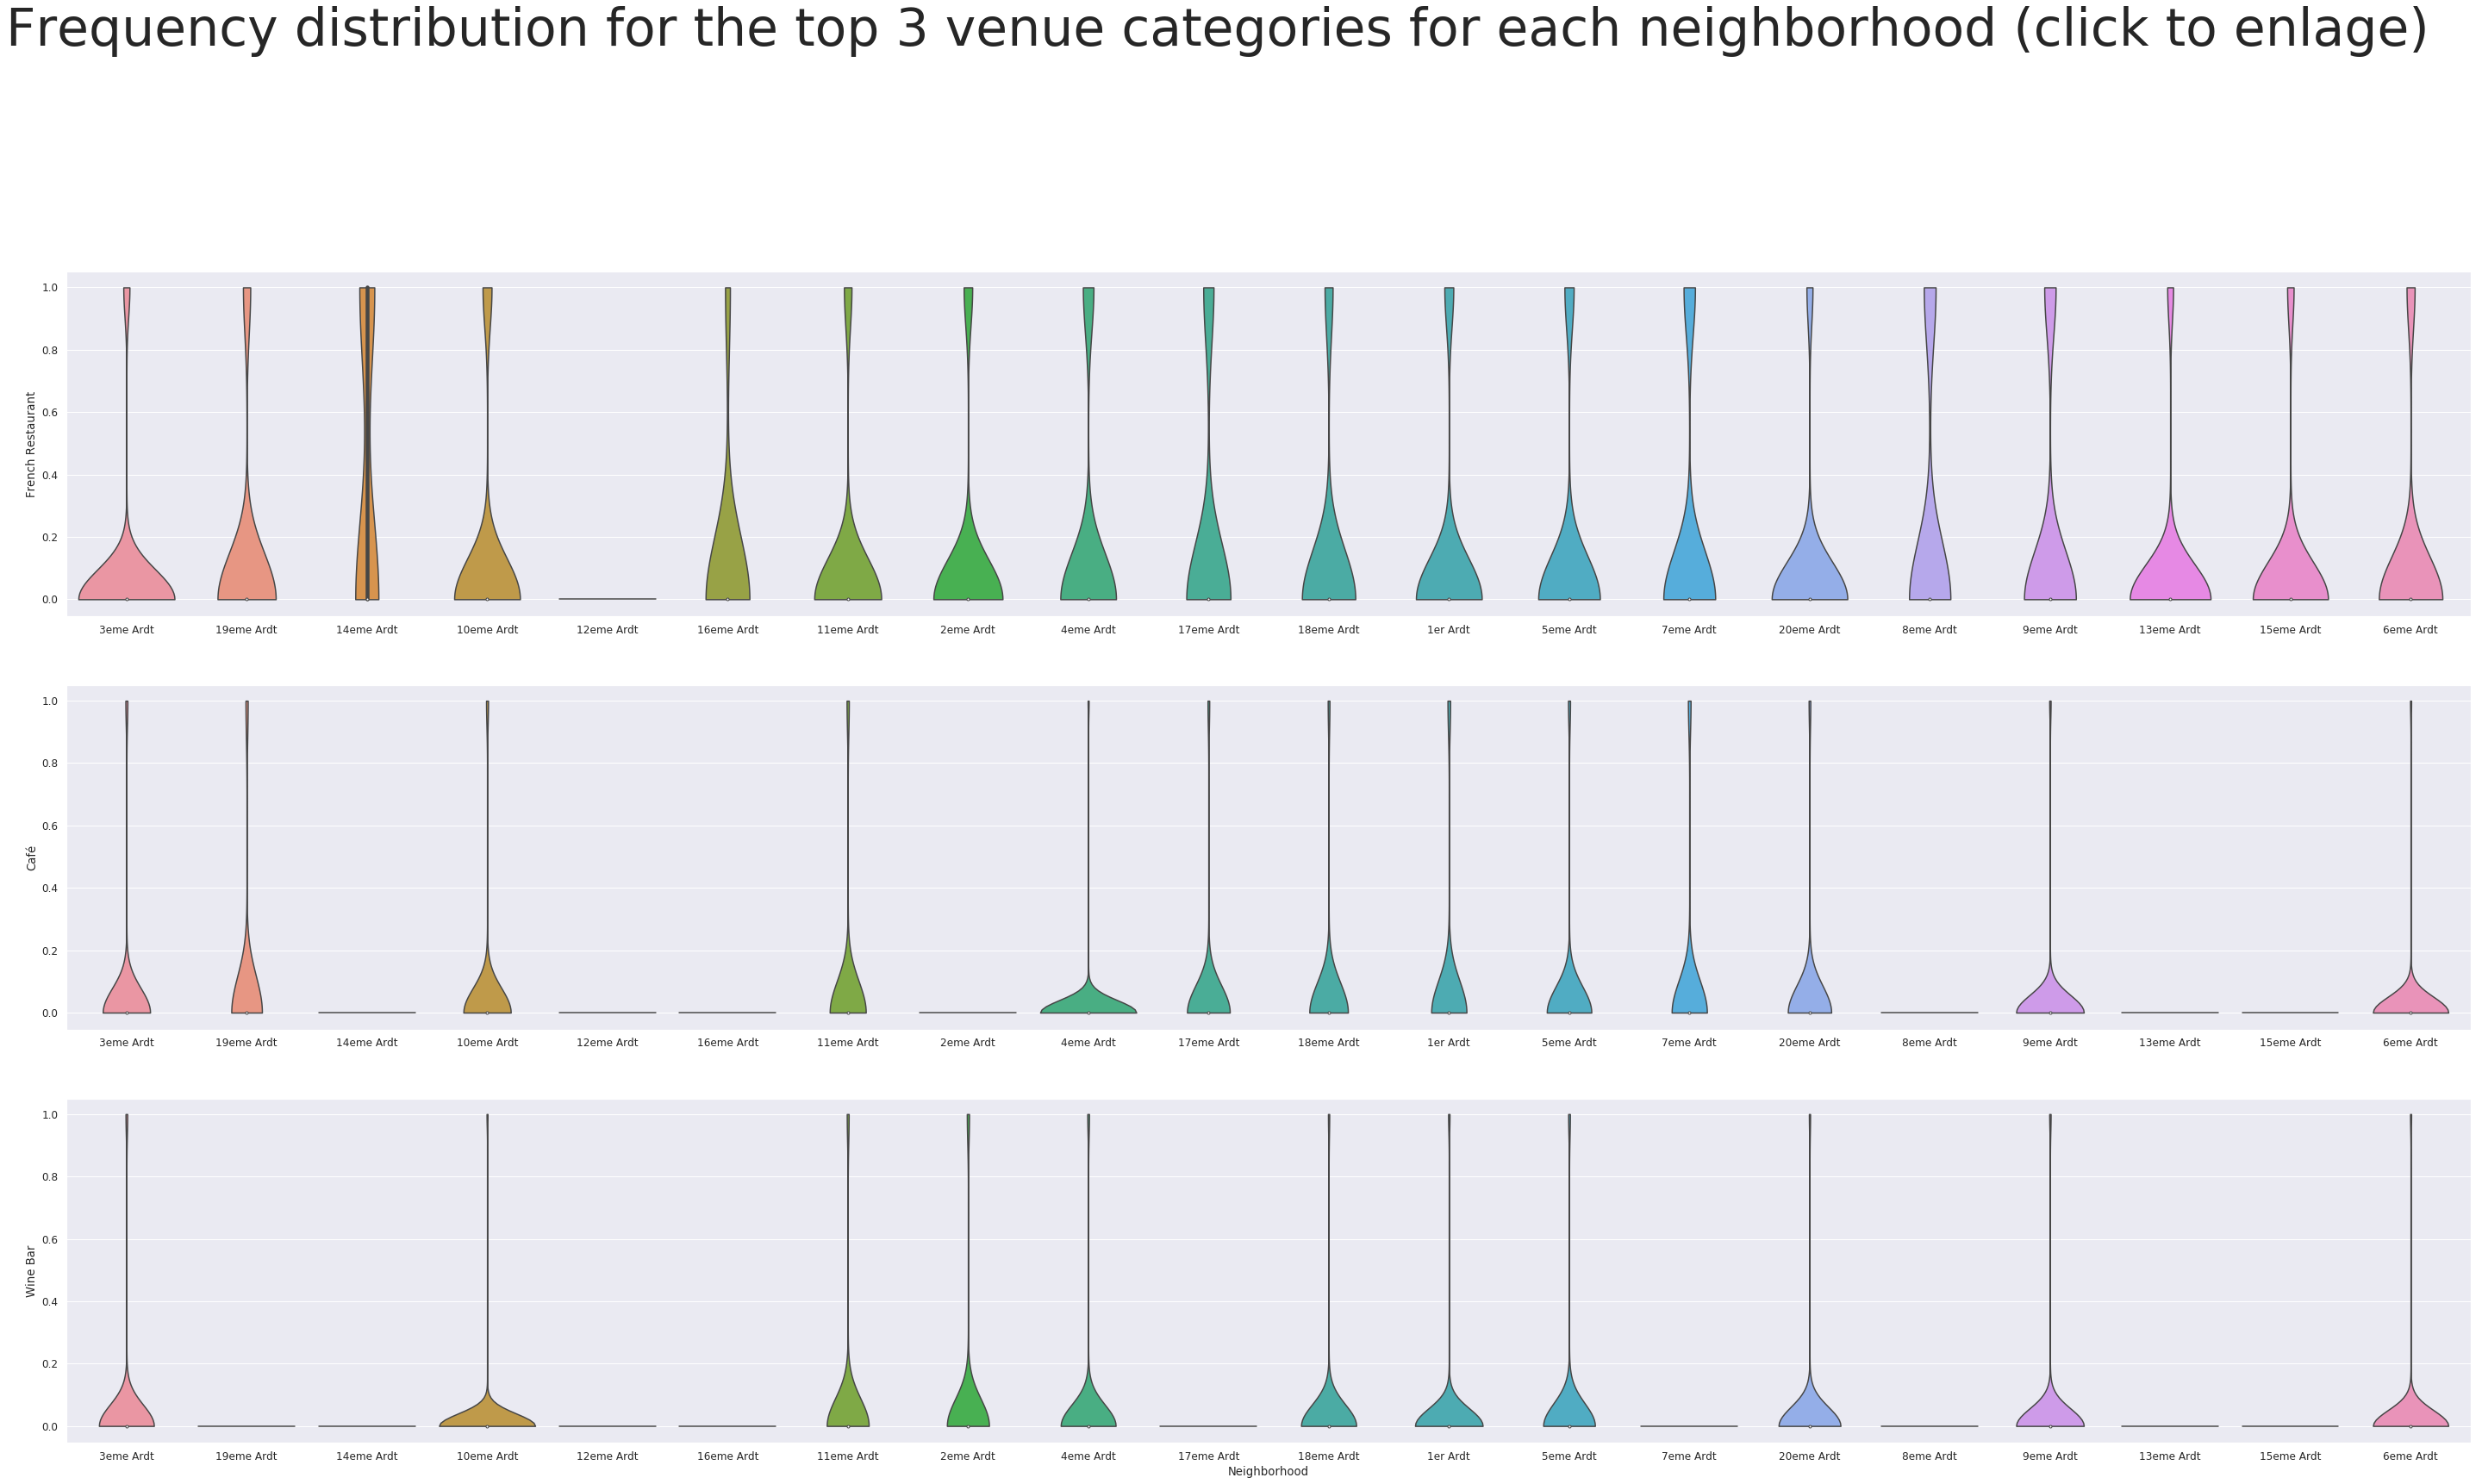

In [33]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

## The Neighborhoods

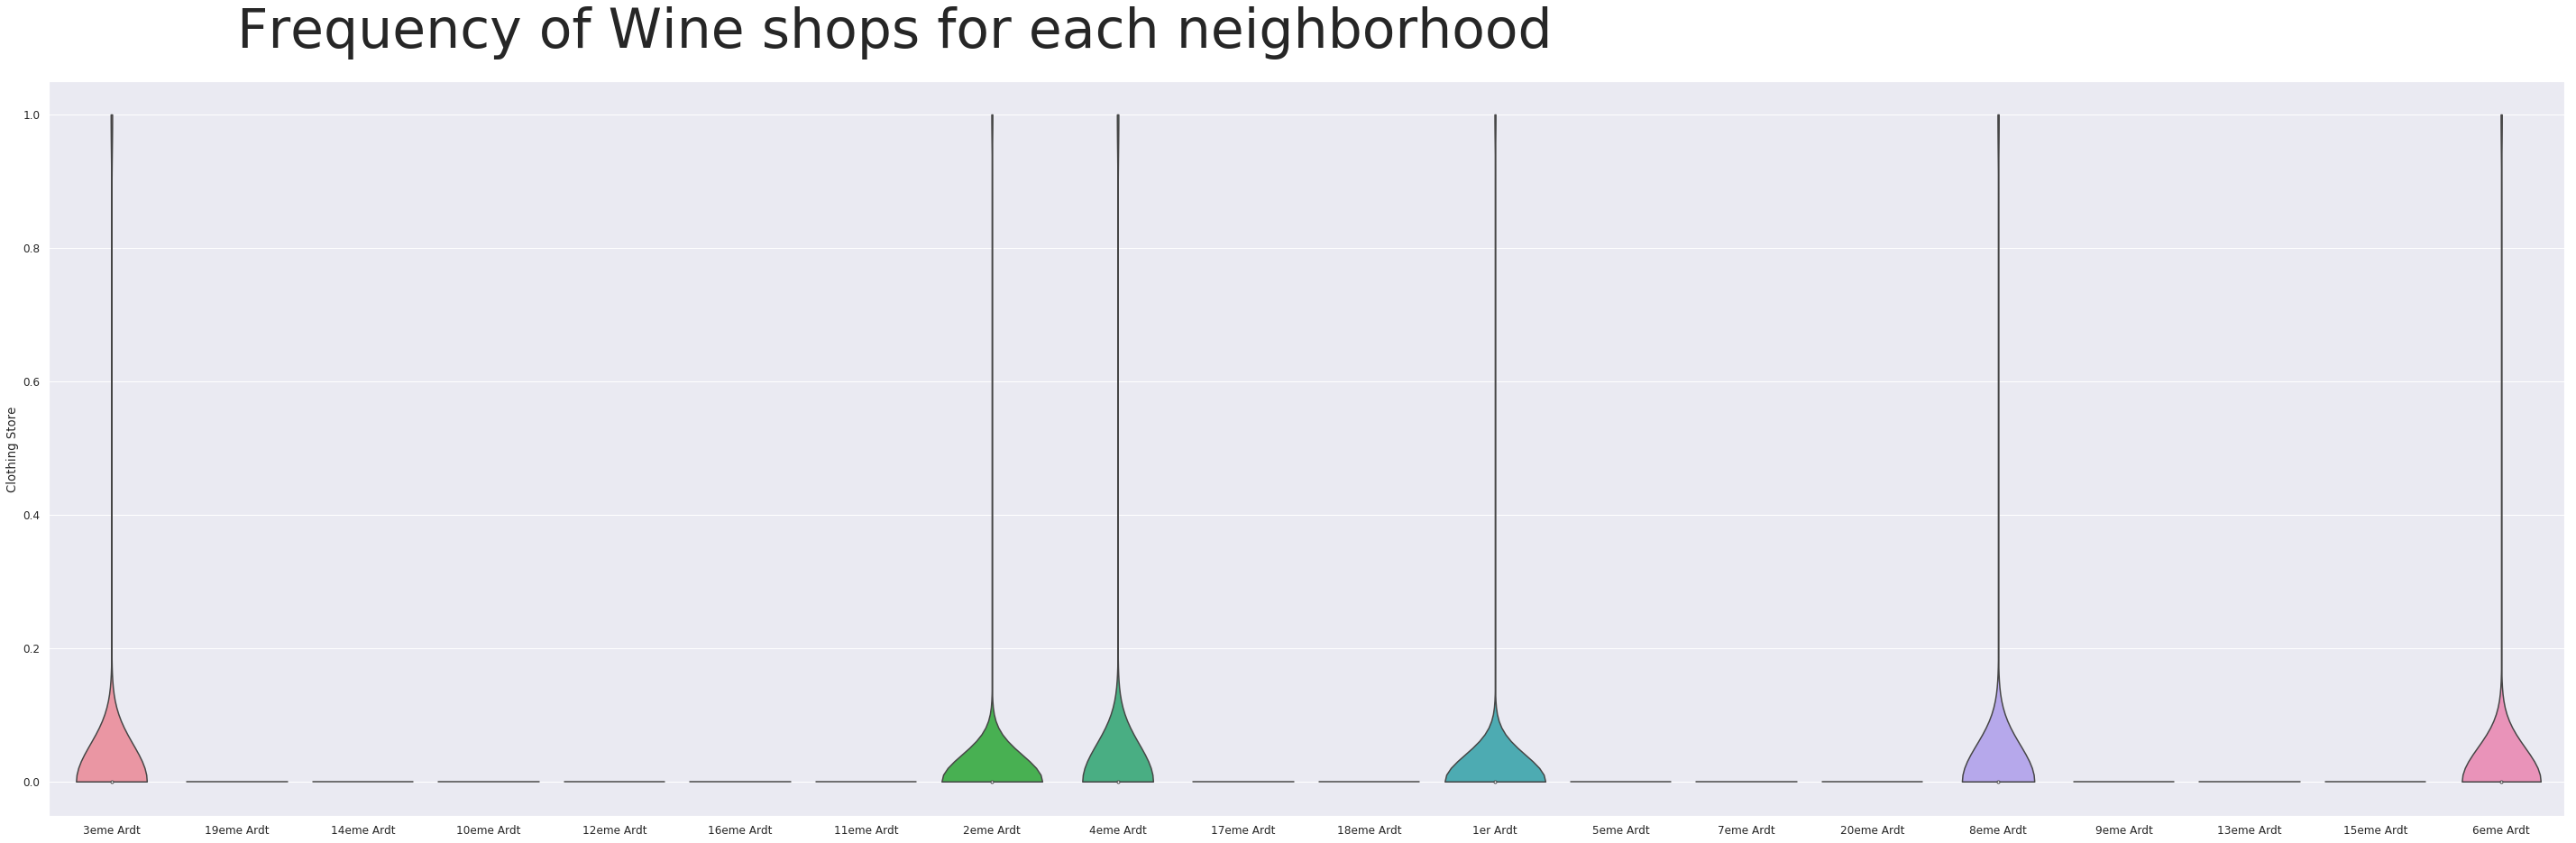

In [35]:
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Wine shops for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()